# Task 1

1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [1]:
import numpy as np
%matplotlib inline

In [2]:
for i in range(0, 5):
    a = input()
    x = np.random.randint(1,37)
    if x == 37:
        print("Zero")
    else:
        print(x)


22

19

30

28

34


# Task 2

2. Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

In [3]:
k,m = 0, 0
n = 100
for i in range(0, n):
    x = np.random.uniform(0, 10)
    if x<5:
#        print("орел")
        k = k + 1
    else:
#        print("решка")
        m = m + 1
print(k,m, 1 == k/n + m /n)

45 55 True


Теорема сложения: Если А и В несовместны: Р(А+В) = Р(А) + Р(В)

Проверим теорему сложения на примере подбрасываний монетки.
Теорема сложения: Если А, В, … – полная группа несовместных событий, то Р(А) + Р(В) + …. = 1

In [4]:
# Функция ставки на конкретный номер:
def move_roulette2(num):
    val = np.random.randint(1,37)
    return val == num

In [5]:
# Симуляция ставки на конкретный номер с общим числом испытаний q
def bet_roulette(num, q):
    win = 0
    loss = 0
    for p in range(q):
        step = move_roulette2(num)
        if step is True:
            win += 1
        else:
            loss += 1
    return win, loss

В европейской рулетке 36 чисел плюс зеро, всего 37 несовместных событий при ставке на конкретный номер.

Проведем 50 серий по 10000 испытаний на число 13 в каждом испытании. Число появлений номера 13 делим на общее число испытаний 10000 и умножаем на 37.

По теореме сложения результатом должно быть 1.

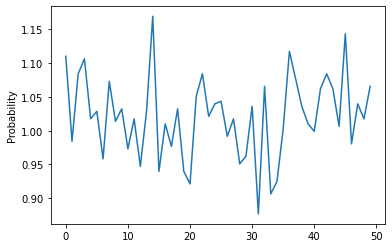

1.020756


In [6]:
from matplotlib import pyplot as plt

y = [ (bet_roulette(13, 10000)[0] / 10000 * 37) for v in range(50) ]
plt.plot(y)
plt.ylabel('Probability')
plt.show()
print(np.mean(y))

# Task 3

Сгенерируйте десять выборок случайных чисел х0, …, х9.
и постройте гистограмму распределения случайной суммы  +х0+ …+ х 9. 

In [7]:
x = np.random.rand(10)
print(x, np.sum(x))

[0.59885038 0.42176256 0.61010416 0.99331274 0.18725324 0.76637874
 0.55772074 0.88318427 0.57209971 0.68136651] 6.272033052580488


Text(0.5, 1.0, 'Histogram')

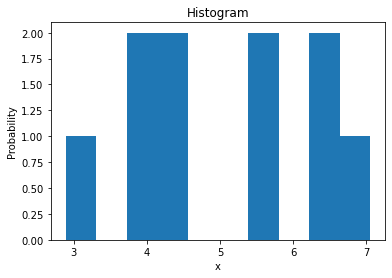

In [8]:
x = [np.sum(np.random.rand(10)) for v in range(10) ]
num_bins = 10
n, bins, patches = plt.hist(x, num_bins)
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Histogram')

# Task 4

Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.

In [9]:
import numpy as np
import itertools

In [10]:
# Функция оценки верятности методом Монте-Карло
def monte_carlo(q):
    k, n = 0, 10000
    a = np.random.randint(0, 2, n)
    b = np.random.randint(0, 2, n)
    c = np.random.randint(0, 2, n)
    d = np.random.randint(0, 2, n)
    x = a + b + c + d
    for i in range(0, n):
        if x[i] == 2:
            k = k + 1
    return k/n

m = monte_carlo(10000)
print(m)

0.3778


Биноминальный коэффициент = n! / k!(n - k)!

Вероятность выпадения среди n независимых испытаний k успехов = k * 1/2^n

In [11]:
# Функция оценки вероятности по формуле Бернулли для биноминального распределения
def bernulli(n, k):
    from math import factorial
    c = factorial(n) / ( factorial(k) * factorial(n - k) )
    p = c * 1 / 2**n
    return p

In [12]:
# Подставляем n = 4, k = 2. Рассчитываем вероятность выпадения 2-х успехов на 4-х испытаниях.
b = bernulli(4, 2)
print(b)

0.375


In [13]:
# Сравнение результатов
print ((m - b) / b)

0.0074666666666667325


# Task 5

Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

In [14]:
def bernulli_1(n, k):
    from math import factorial
    c = int(factorial(n) / ( factorial(k) * factorial(n - k) ))
    p = c * 1 / 2**n
    return c, p

In [15]:
bernulli_1(6, 3)

(20, 0.3125)

In [16]:
import numpy as np
import itertools

In [17]:
# Перестановки - это размещения, в которых n=k. Сгенерируем варианты перестановок при n=k=5
for p in itertools.permutations("01234",5):
    print(''.join(str(x) for x in p))

01234
01243
01324
01342
01423
01432
02134
02143
02314
02341
02413
02431
03124
03142
03214
03241
03412
03421
04123
04132
04213
04231
04312
04321
10234
10243
10324
10342
10423
10432
12034
12043
12304
12340
12403
12430
13024
13042
13204
13240
13402
13420
14023
14032
14203
14230
14302
14320
20134
20143
20314
20341
20413
20431
21034
21043
21304
21340
21403
21430
23014
23041
23104
23140
23401
23410
24013
24031
24103
24130
24301
24310
30124
30142
30214
30241
30412
30421
31024
31042
31204
31240
31402
31420
32014
32041
32104
32140
32401
32410
34012
34021
34102
34120
34201
34210
40123
40132
40213
40231
40312
40321
41023
41032
41203
41230
41302
41320
42013
42031
42103
42130
42301
42310
43012
43021
43102
43120
43201
43210


In [18]:
# Сгенерируем варианты размещений при n=5, k=2
for p in itertools.permutations("01234",2):
    print(''.join(str(x) for x in p))

01
02
03
04
10
12
13
14
20
21
23
24
30
31
32
34
40
41
42
43


In [19]:
# Сочетания при n=5, k=3
for p in itertools.combinations("01234",3):
    print(''.join(p))

012
013
014
023
024
034
123
124
134
234
